# 상관분석

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
cluster0 =[ 
'used_memory_rss',
'used_memory_rss_human',
'rss_overhead_ratio',
'rss_overhead_bytes',
'mem_fragmentation_ratio',
'mem_fragmentation_bytes']

cluster1 = [
    'uptime_in_seconds',
    'hz',
    'lru_clock',
    'used_memory_peak',
    'maxmemory',
    'maxmemory_human',
    'rdb_last_save_time',
    'total_net_output_bytes',
    'used_cpu_sys',
    'used_cpu_user'
]

cluster2 = [
    'allocator_allocated',
    'allocator_active',
    'allocator_frag_bytes',
    'instantaneous_ops_per_sec',
    'instantaneous_input_kbps',
    'instantaneous_output_kbps'
]

cluster3 = [
    'allocator_resident',
    'allocator_rss_ratio',
    'allocator_rss_bytes'  
]

knob_list = [
    "save0_0",
    "save0_1",
    "save1_0",
    "save1_1",
    "save2_0",
    "save2_1",

    "rdbcompression",
    "rdbchecksum",
    "rdb-save-incremental-fsync",

    "activedefrag",
    "active-defrag-threshold-lower",
    "active-defrag-threshold-upper",
    "active-defrag-cycle-min",
    "active-defrag-cycle-max",
    
    "maxmemory",
    
    "maxmemory-policy",
    "maxmemory-samples",
    "lazyfree-lazy-eviction",
    "lazyfree-lazy-expire",
    "lazyfree-lazy-server-del",

    "hash-max-ziplist-entries", 
    "hash-max-ziplist-value",
    "activerehashing",
    "hz",
    "dynamic-hz"
]

In [42]:
# 데이터 불러오기 internal metrics와 knob들의 상관관계분석
internal_m = pd.read_csv('internal_metrcis0.csv')

In [43]:
# 데이터 불러오기 knob_list
knobs = pd.read_csv('result_config0.csv')

In [23]:
# 정규화
from sklearn.preprocessing import StandardScaler

def scaling(df):
    scaler = StandardScaler()  # 객체 생성
    copied_df = df.copy()  # 복사
    scaler.fit(copied_df) # fitting
    scaled_df = scaler.transform(copied_df)
    
    scaled_df = pd.DataFrame(scaled_df, columns = df.columns, index=list(df.index.values))
    return scaled_df 

# scaler = StandardScaler()  # 객체 생성
# copied_internal = internal_m.copy()  # 복사
# scaler.fit(copied_internal)  # fitting
# scaledInternal_m = scaler.transform(copied_internal) 

# scaledInternal_m = pd.DataFrame(scaledInternal_m, columns = internal_m.columns, index = list(internal_m.index.values))

In [5]:
# internal metrics 추출 함수
def extract_internal(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]
    
#     scaled_df = scaling(extracted_df)
#     return scaled_df   
    return extracted_df

# knob 추출 함수
def extract_knob(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]

    return extracted_df    

## 전체 상관분석

In [44]:
# 클러스터 합치기
cluster = cluster0+cluster1+cluster2+cluster3

In [45]:
# 클러스터 요소에 해당되는 metrics 25개 추출
total_internal_df = extract_internal(cluster, internal_m)
total_internal_df.head()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,3.861151,38658184,38932480,274296,45654,3187.77,226.38,42209280,1.08,3276800
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,3.926858,38658328,38932480,274152,55643,3885.23,275.94,44310528,1.14,5378048
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,3.828146,38657784,38932480,274696,50950,3557.60,252.57,42209280,1.08,3276800
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,3.816183,38658184,38932480,274296,52136,3640.36,258.74,42209280,1.08,3276800
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,4.059768,38657928,38932480,274552,53721,3751.05,266.38,42209280,1.08,3276800


In [47]:
# throughput 결측치 제거
total_internal_df.dropna()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,3.861151,38658184,38932480,274296,45654,3187.77,226.38,42209280,1.08,3276800
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,3.926858,38658328,38932480,274152,55643,3885.23,275.94,44310528,1.14,5378048
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,3.828146,38657784,38932480,274696,50950,3557.60,252.57,42209280,1.08,3276800
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,3.816183,38658184,38932480,274296,52136,3640.36,258.74,42209280,1.08,3276800
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,4.059768,38657928,38932480,274552,53721,3751.05,266.38,42209280,1.08,3276800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,41787392,39.85,0.99,-372736,1.08,3126224,22,25,1823694,38704616,...,4.146845,38696888,38973440,276552,59397,4147.40,294.26,42160128,1.08,3186688
2496,42037248,40.09,0.95,-2273280,1.09,3414640,22,7,1823722,38704616,...,3.992813,38658000,38932480,274480,42192,2946.03,209.28,44310528,1.14,5378048
2497,42041344,40.09,1.00,-167936,1.09,3418736,22,13,1823750,38704616,...,4.083693,38658336,38932480,274144,37208,2598.02,184.97,42209280,1.08,3276800
2498,42037248,40.09,0.95,-2273280,1.09,3414640,22,35,1823779,38704632,...,3.811128,38658328,38932480,274152,21943,1532.13,108.87,44310528,1.14,5378048


In [48]:
total_internal_df.shape

(2500, 25)

In [34]:
# throughtpu 결측치 확인
total_internal_df.notna().sum()
total_internal_df.isnull().sum()

used_memory_rss              0
used_memory_rss_human        0
rss_overhead_ratio           0
rss_overhead_bytes           0
mem_fragmentation_ratio      0
mem_fragmentation_bytes      0
uptime_in_seconds            0
hz                           0
lru_clock                    0
used_memory_peak             0
maxmemory                    0
maxmemory_human              0
rdb_last_save_time           0
total_net_output_bytes       0
used_cpu_sys                 0
used_cpu_user                0
allocator_allocated          0
allocator_active             0
allocator_frag_bytes         0
instantaneous_ops_per_sec    0
instantaneous_input_kbps     0
instantaneous_output_kbps    0
allocator_resident           0
allocator_rss_ratio          0
allocator_rss_bytes          0
dtype: int64

In [24]:
# throuput 결측치 처리
total_internal_df.fillna(0)

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,3.861151,38658184,38932480,274296,45654,3187.77,226.38,42209280,1.08,3276800
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,3.926858,38658328,38932480,274152,55643,3885.23,275.94,44310528,1.14,5378048
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,3.828146,38657784,38932480,274696,50950,3557.60,252.57,42209280,1.08,3276800
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,3.816183,38658184,38932480,274296,52136,3640.36,258.74,42209280,1.08,3276800
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,4.059768,38657928,38932480,274552,53721,3751.05,266.38,42209280,1.08,3276800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,41787392,39.85,0.99,-372736,1.08,3126224,22,25,1823694,38704616,...,4.146845,38696888,38973440,276552,59397,4147.40,294.26,42160128,1.08,3186688
2496,42037248,40.09,0.95,-2273280,1.09,3414640,22,7,1823722,38704616,...,3.992813,38658000,38932480,274480,42192,2946.03,209.28,44310528,1.14,5378048
2497,42041344,40.09,1.00,-167936,1.09,3418736,22,13,1823750,38704616,...,4.083693,38658336,38932480,274144,37208,2598.02,184.97,42209280,1.08,3276800
2498,42037248,40.09,0.95,-2273280,1.09,3414640,22,35,1823779,38704632,...,3.811128,38658328,38932480,274152,21943,1532.13,108.87,44310528,1.14,5378048


In [8]:
# knobs 에서 object 형 찾기
object_var = []
for idx in knobs.dtypes.index:
    if knobs.dtypes[idx] == 'O':
        object_var.append(idx)
object_var

['rdbcompression',
 'rdbchecksum',
 'rdb-save-incremental-fsync',
 'activedefrag',
 'maxmemory',
 'maxmemory-policy',
 'lazyfree-lazy-eviction',
 'lazyfree-lazy-expire',
 'lazyfree-lazy-server-del',
 'activerehashing',
 'dynamic-hz']

In [21]:
# knob_list 만 추출
subTotal_knobs = extract_knob(knob_list, knobs)

# object 형 제거
knobs_numeric = subTotal_knobs.drop(columns=object_var, axis=0)
# knobs_numeric = scaling(knobs_numeric)  # 표준화
knobs_numeric.head()

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,805,5,178,91,36,9230,23.0,84.0,24.0,72.0,5,258,253,7
1,1097,3,499,33,82,9410,25.0,100.0,13.0,80.0,3,360,226,32
2,1018,2,497,23,36,8649,17.0,79.0,30.0,71.0,3,364,136,40
3,858,5,423,14,80,8407,12.0,77.0,17.0,89.0,3,417,173,37
4,727,6,230,54,61,8327,9.0,87.0,13.0,85.0,4,522,141,30


In [49]:
# knob 결측치 제거
knobs_numeric.dropna()

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,805,5,178,91,36,9230,23.0,84.0,24.0,72.0,5,258,253,7
1,1097,3,499,33,82,9410,25.0,100.0,13.0,80.0,3,360,226,32
2,1018,2,497,23,36,8649,17.0,79.0,30.0,71.0,3,364,136,40
3,858,5,423,14,80,8407,12.0,77.0,17.0,89.0,3,417,173,37
4,727,6,230,54,61,8327,9.0,87.0,13.0,85.0,4,522,141,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1036,6,386,50,43,9754,6.0,96.0,16.0,88.0,3,715,249,6
2495,726,6,258,25,54,8545,13.0,100.0,21.0,86.0,7,538,54,25
2496,930,8,166,98,50,10113,3.0,92.0,25.0,79.0,4,735,67,7
2497,825,4,436,69,43,10806,25.0,98.0,3.0,75.0,4,538,63,13


In [50]:
knobs_numeric.shape

(2500, 14)

In [55]:
# knob 결측치 처리
knobs_numeric.notna().sum()
# total_internal_df.isnull().sum()

save0_0                          2500
save0_1                          2500
save1_0                          2500
save1_1                          2500
save2_0                          2500
save2_1                          2500
active-defrag-threshold-lower    1252
active-defrag-threshold-upper    1252
active-defrag-cycle-min          1252
active-defrag-cycle-max          1252
maxmemory-samples                2500
hash-max-ziplist-entries         2500
hash-max-ziplist-value           2500
hz                               2500
dtype: int64

In [37]:
# knob 결측치 처리
knobs_numeric.fillna(0)

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,805,5,178,91,36,9230,23.0,84.0,24.0,72.0,5,258,253,7
1,1097,3,499,33,82,9410,25.0,100.0,13.0,80.0,3,360,226,32
2,1018,2,497,23,36,8649,17.0,79.0,30.0,71.0,3,364,136,40
3,858,5,423,14,80,8407,12.0,77.0,17.0,89.0,3,417,173,37
4,727,6,230,54,61,8327,9.0,87.0,13.0,85.0,4,522,141,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,726,6,258,25,54,8545,13.0,100.0,21.0,86.0,7,538,54,25
2496,930,8,166,98,50,10113,3.0,92.0,25.0,79.0,4,735,67,7
2497,825,4,436,69,43,10806,25.0,98.0,3.0,75.0,4,538,63,13
2498,1025,1,122,50,67,9759,1.0,75.0,26.0,74.0,3,337,54,35


In [25]:
# 데이터 프레임 합치기
total_df = pd.concat([total_internal_df, knobs_numeric], axis=1)
total_df

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,36,9230,23.0,84.0,24.0,72.0,5,258,253,7
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,82,9410,25.0,100.0,13.0,80.0,3,360,226,32
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,36,8649,17.0,79.0,30.0,71.0,3,364,136,40
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,80,8407,12.0,77.0,17.0,89.0,3,417,173,37
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,61,8327,9.0,87.0,13.0,85.0,4,522,141,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,41787392,39.85,0.99,-372736,1.08,3126224,22,25,1823694,38704616,...,54,8545,13.0,100.0,21.0,86.0,7,538,54,25
2496,42037248,40.09,0.95,-2273280,1.09,3414640,22,7,1823722,38704616,...,50,10113,3.0,92.0,25.0,79.0,4,735,67,7
2497,42041344,40.09,1.00,-167936,1.09,3418736,22,13,1823750,38704616,...,43,10806,25.0,98.0,3.0,75.0,4,538,63,13
2498,42037248,40.09,0.95,-2273280,1.09,3414640,22,35,1823779,38704632,...,67,9759,1.0,75.0,26.0,74.0,3,337,54,35


In [26]:
# internal 살펴보기
total_internal_df.head()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,3.861151,38658184,38932480,274296,45654,3187.77,226.38,42209280,1.08,3276800
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,3.926858,38658328,38932480,274152,55643,3885.23,275.94,44310528,1.14,5378048
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,3.828146,38657784,38932480,274696,50950,3557.60,252.57,42209280,1.08,3276800
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,3.816183,38658184,38932480,274296,52136,3640.36,258.74,42209280,1.08,3276800
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,4.059768,38657928,38932480,274552,53721,3751.05,266.38,42209280,1.08,3276800


In [27]:
# config 살펴보기
knobs_numeric.head()

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,805,5,178,91,36,9230,23.0,84.0,24.0,72.0,5,258,253,7
1,1097,3,499,33,82,9410,25.0,100.0,13.0,80.0,3,360,226,32
2,1018,2,497,23,36,8649,17.0,79.0,30.0,71.0,3,364,136,40
3,858,5,423,14,80,8407,12.0,77.0,17.0,89.0,3,417,173,37
4,727,6,230,54,61,8327,9.0,87.0,13.0,85.0,4,522,141,30


In [28]:
# 상관분석
total_corr = total_df.corr()
total_corr.iloc[25:]

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
save0_0,-0.036020,-0.035877,-0.013531,-0.012455,-0.036777,-0.037585,0.029710,0.018332,0.005661,0.009141,...,-0.043828,-0.038810,-0.043126,0.023185,0.019634,-0.009677,-0.001427,-0.030526,0.008055,0.018332
save0_1,0.007181,0.006874,0.021126,0.020542,0.006690,0.006705,-0.000156,0.031906,0.021089,0.010604,...,0.004128,0.016318,0.024388,0.032945,-0.023396,0.007538,0.042172,-0.006128,-0.037275,0.031906
save1_0,0.014114,0.014133,-0.017103,-0.019374,0.014293,0.013742,-0.020460,-0.012160,-0.006650,-0.010424,...,-0.003383,-0.008742,-0.028014,0.026873,0.036078,-0.037840,0.010482,-0.017345,-0.030370,-0.012160
save1_1,0.016766,0.016769,0.019402,0.016459,0.019247,0.012776,-0.031960,-0.009752,0.011386,0.018766,...,0.012919,-0.012707,-0.059188,0.002854,0.013580,0.036530,-0.003376,0.012003,0.045454,-0.009752
save2_0,0.036008,0.036051,0.011302,0.013015,0.033453,0.038080,-0.020695,-0.017455,0.009757,0.011768,...,1.000000,-0.017321,0.014381,0.036327,0.052128,0.020237,0.004725,-0.024492,0.022968,-0.017455
save2_1,-0.021835,-0.021739,-0.004310,-0.003565,-0.024599,-0.021267,0.028781,0.033442,-0.016499,0.018332,...,-0.017321,1.000000,0.040124,-0.016648,-0.022852,0.017062,0.003587,-0.013027,0.033825,0.033442
active-defrag-threshold-lower,0.000994,0.000933,-0.053878,-0.049602,-0.001833,0.000200,-0.003341,-0.049257,-0.032636,0.009897,...,0.014381,0.040124,1.000000,0.005438,0.044248,0.005313,-0.038826,-0.020472,0.005436,-0.049257
active-defrag-threshold-upper,-0.036325,-0.035962,-0.031616,-0.033496,-0.032134,-0.041237,-0.017158,0.011778,0.020038,-0.002531,...,0.036327,-0.016648,0.005438,1.000000,-0.004159,0.023879,-0.013534,0.034837,0.007858,0.011778
active-defrag-cycle-min,-0.017982,-0.018194,-0.038560,-0.034073,-0.020953,-0.013752,0.029321,0.004380,0.037258,0.022953,...,0.052128,-0.022852,0.044248,-0.004159,1.000000,0.022056,-0.026963,-0.016855,0.021036,0.004380
active-defrag-cycle-max,0.011084,0.011491,0.008291,0.012002,0.011560,0.008546,0.011329,-0.027743,0.014114,-0.032141,...,0.020237,0.017062,0.005313,0.023879,0.022056,1.000000,0.000636,0.007641,-0.009687,-0.027743


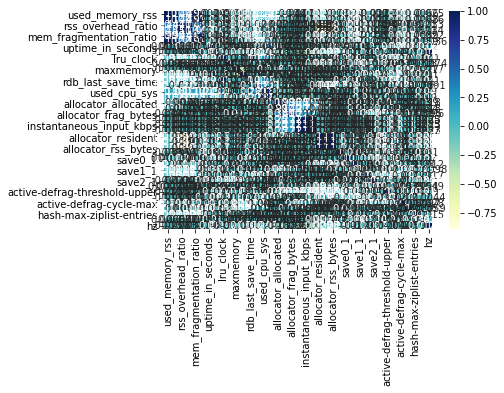

In [200]:
sns.heatmap(total_corr,cmap = 'YlGnBu', annot=True) 
plt.show()

### 넘파이 상관계수 및 공분산

In [53]:
# 상관계수 함수
def corr_np(X, Y):    
    cov = np.cov(X, Y)[0,1]  # 공분산
    corr = cov/(np.std(X)*np.std(Y))  # 표준화
    return corr

In [62]:
X = total_internal_df['used_memory_rss']
Y = knobs_numeric['hash-max-ziplist-entries']

corr_np(X, Y)

0.013132942408941077

In [70]:
total_internal_df[total_internal_df['used_memory_rss'] == 0]

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes


---

In [144]:
# internal cluster 리스트 가져오기 
cluster0_internal = extract_internal(cluster0, internal_m)
cluster1_internal = extract_internal(cluster1, internal_m)
cluster2_internal = extract_internal(cluster2, internal_m)
cluster3_internal = extract_internal(cluster3, internal_m)


In [ ]:
# 상관분석 knob 하나에 대해서
def corr(knob, cluster_internal):
    cluster_internal[knob.columns[0]] = knob
    
    corr = cluster_internal.corr()
    print(corr.iloc[:,-1])
#     print(corr)
    
    sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [158]:
# knob 가져오기
knob_df = extract_knob(knob_list, knobs)

# 하나만 대입
knob_df1 = knob_df[['hz']]
scaled_knob_df1 = scaling(knob_df1)

In [159]:
knob_df.dtypes

save0_0                            int64
save0_1                            int64
save1_0                            int64
save1_1                            int64
save2_0                            int64
save2_1                            int64
rdbcompression                    object
rdbchecksum                       object
rdb-save-incremental-fsync        object
activedefrag                      object
active-defrag-threshold-lower    float64
active-defrag-threshold-upper    float64
active-defrag-cycle-min          float64
active-defrag-cycle-max          float64
maxmemory                         object
maxmemory-policy                  object
maxmemory-samples                  int64
lazyfree-lazy-eviction            object
lazyfree-lazy-expire              object
lazyfree-lazy-server-del          object
hash-max-ziplist-entries           int64
hash-max-ziplist-value             int64
activerehashing                   object
hz                                 int64
dynamic-hz      

allocator_allocated         -0.176843
allocator_active            -0.180201
allocator_frag_bytes        -0.096348
instantaneous_ops_per_sec   -0.228475
instantaneous_input_kbps    -0.228475
instantaneous_output_kbps   -0.227200
active-defrag-cycle-min      0.004380
hz                           1.000000
Name: hz, dtype: float64


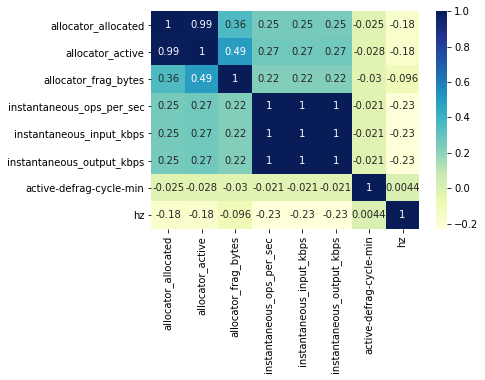

In [161]:
# corr(scaled_knob_df1, cluster0_internal) 
# corr(scaled_knob_df1, cluster1_internal)  # maxmemory-samples, hz
# corr(scaled_knob_df1, cluster2_internal) 
# corr(scaled_knob_df1, cluster3_internal)

In [70]:
df_t.corr()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,maxmemory-samples
used_memory_rss,1.000000,0.999974,0.440043,0.445659,0.991678,0.995400,0.012910
used_memory_rss_human,0.999974,1.000000,0.439682,0.445294,0.991652,0.995361,0.013163
rss_overhead_ratio,0.440043,0.439682,1.000000,0.996718,0.437873,0.439462,0.005675
rss_overhead_bytes,0.445659,0.445294,0.996718,1.000000,0.440232,0.445696,0.006500
mem_fragmentation_ratio,0.991678,0.991652,0.437873,0.440232,1.000000,0.990840,0.014031
mem_fragmentation_bytes,0.995400,0.995361,0.439462,0.445696,0.990840,1.000000,0.013958
maxmemory-samples,0.012910,0.013163,0.005675,0.006500,0.014031,0.013958,1.000000


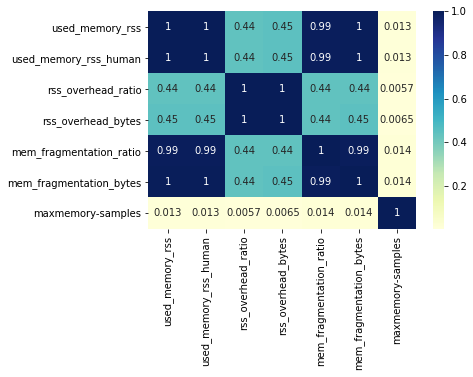

In [77]:
sns.heatmap(df_t.corr(),cmap = 'YlGnBu', annot=True) 
plt.show()